##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [10]:
%pip install pandas 
%pip install matplotlib
%pip install seaborn
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [78]:
# Can have as many cells as you want for code
import pandas as pd
import numpy as np
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [79]:
data2 = pd.read_csv("./data/catA_train.csv")
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [80]:
#checking for missing values
print(data2.isna().sum())
col_names = data2.columns

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [81]:
data2 = data2.dropna(subset=['LATITUDE','LONGITUDE','Year Found','Parent Company', 'Parent Country','Employees (Domestic Ultimate Total)','Employees (Global Ultimate Total)',
       'Global Ultimate Company', 'Global Ultimate Country',
       'Domestic Ultimate Company'])
data2.isna().sum()
data2 = data2.drop(columns=[col for col in ['Square Footage','Fiscal Year End','Import/Export Status','Employees (Single Site)'] if col in col_names], errors='ignore')

In [82]:
com_status = data2['Company Status (Active/Inactive)']
data2 = data2[com_status == 'Active']

data3 = pd.get_dummies(data2, columns=['Entity Type'], prefix='Entity_Type') 
data3 = pd.get_dummies(data3, columns=['Ownership Type'], prefix='Ownership_Type')

In [83]:
data3.columns

Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Parent Company', 'Parent Country', 'Company Description',
       'Company Status (Active/Inactive)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Global Ultimate Company',
       'Global Ultimate Country', 'Domestic Ultimate Company',
       'Is Domestic Ultimate', 'Is Global Ultimate', 'Entity_Type_Branch',
       'Entity_Type_Independent', 'Entity_Type_Parent',
       'Entity_Type_Subsidiary', 'Ownership_Type_Non-Corporates',
       'Ownership_Type_Nonprofit', 'Ownership_Type_Partnership',
       'Ownership_Type_Private', 'Ownership_Type_Public',
       'Ownership_Type_Public Sector'],
      dtype='object')

In [84]:
sic_freq = data3['SIC Code'].value_counts()
bound = 9 

sic_below_bound = sic_freq[sic_freq < bound].index
data3['SIC Code'] = data3['SIC Code'].replace(sic_below_bound, 'Others')

sic_freq1= data3['SIC Code'].value_counts()
print(sic_freq1)


SIC Code
6719.0    6957
8742.0    1188
Others    1078
7371.0     685
4731.0     593
          ... 
3535.0       9
2599.0       9
5136.0       9
5311.0       9
3496.0       9
Name: count, Length: 277, dtype: int64


In [85]:
data3=data3[data3['SIC Code']!='Others']
data3['SIC Code'].unique()

array([6719.0, 2051.0, 7379.0, 2821.0, 6726.0, 7389.0, 5812.0, 7539.0,
       4731.0, 7319.0, 3827.0, 8742.0, 1522.0, 8711.0, 6712.0, 4119.0,
       5082.0, 5169.0, 8741.0, 6799.0, 5099.0, 5813.0, 3241.0, 7371.0,
       7311.0, 4899.0, 5065.0, 3731.0, 4499.0, 5013.0, 5621.0, 5149.0,
       5085.0, 6552.0, 8011.0, 6531.0, 3999.0, 5122.0, 8111.0, 5084.0,
       3533.0, 5039.0, 6411.0, 4225.0, 3841.0, 5999.0, 5944.0, 1799.0,
       4789.0, 4724.0, 8611.0, 6733.0, 8731.0, 5111.0, 6159.0, 4492.0,
       7011.0, 5172.0, 2834.0, 8748.0, 3531.0, 7812.0, 7361.0, 5012.0,
       5031.0, 7699.0, 3669.0, 5182.0, 3273.0, 8743.0, 2759.0, 4911.0,
       7349.0, 5023.0, 3545.0, 9621.0, 8099.0, 5194.0, 5047.0, 5046.0,
       8351.0, 2819.0, 4226.0, 3599.0, 6099.0, 5045.0, 5192.0, 6289.0,
       6798.0, 7373.0, 5499.0, 5712.0, 3674.0, 1382.0, 1542.0, 7384.0,
       5063.0, 6722.0, 7376.0, 5072.0, 5052.0, 3471.0, 4449.0, 5961.0,
       5087.0, 7997.0, 5963.0, 7822.0, 8249.0, 3679.0, 6141.0, 1611.0,
      

In [86]:
data3['SIC Code'] = data3['SIC Code'].astype(str)

In [88]:
from sklearn.preprocessing import LabelEncoder

# Use label encoding for 'SIC Code'
label_encoder = LabelEncoder()
data3['SIC Code'] = label_encoder.fit_transform(data3['SIC Code'])

data3["SIC Code"].unique()

array([205,  17, 231,  28, 207, 234, 173, 236,  90, 218,  75, 270,   3,
       261, 204,  78, 123, 151, 269, 211, 132, 174,  37, 225, 217,  96,
       119,  71,  85, 100, 166, 146, 125, 202, 247, 201,  77, 136, 251,
       124,  49, 108, 198,  80,  76, 183, 178,  15,  92,  89, 259, 208,
       265, 133, 188,  84, 212, 152,  30, 273,  48, 240, 224,  99, 105,
       239,  65, 153,  39, 271,  25,  97, 221, 104,  53, 275, 250, 156,
       113, 112, 258,  27,  81,  61, 185, 111, 155, 193, 210, 227, 162,
       169,  67,   1,   5, 233, 117, 206, 229, 120, 116,  44,  82, 179,
       126, 245, 180, 241, 255,  68, 186,   6, 266, 172,  87, 274,  19,
       219, 246, 127,  56,  63, 257, 150, 223,   2,   9, 209, 158, 115,
       220,  94, 154, 110,  33, 263, 253, 131, 200, 163, 256,  55,  35,
        11,  13, 161, 164,  70, 147,  72, 190, 195, 103,  36,  31,   4,
       272,  98,  74, 168,  34, 141, 167,  59, 137, 145,  88,  93, 107,
       242, 254, 226, 228,  10,  86,  16, 114, 135,  41, 184,  5

In [89]:
data3.dtypes
data3_df = data3.select_dtypes(include=['float64','int64'])
corr_matrix = data3_df.corr()
corr_df = pd.DataFrame(corr_matrix)
corr_df

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
LATITUDE,1.000000,-0.045250,-0.112123,-0.095112,-0.026874,0.008733,-0.009742,0.006878,-0.007920,-0.017237,-0.041502
LONGITUDE,-0.045250,1.000000,0.020911,0.020463,-0.004323,0.012960,0.006092,-0.008560,0.004427,0.004950,0.009558
SIC Code,-0.112123,0.020911,1.000000,0.983293,0.189602,-0.017841,-0.003288,-0.015047,-0.024836,0.035948,0.113119
8-Digit SIC Code,-0.095112,0.020463,0.983293,1.000000,0.184985,-0.017307,0.000581,-0.012468,-0.017886,0.040730,0.099882
Year Found,-0.026874,-0.004323,0.189602,0.184985,1.000000,-0.042765,-0.023749,0.018554,-0.020355,0.102438,0.128750
Employees (Domestic Ultimate Total),0.008733,0.012960,-0.017841,-0.017307,-0.042765,1.000000,0.012380,0.015330,0.007306,-0.061417,-0.049195
Employees (Global Ultimate Total),-0.009742,0.006092,-0.003288,0.000581,-0.023749,0.012380,1.000000,-0.004789,0.657032,0.086831,-0.088630
Sales (Domestic Ultimate Total USD),0.006878,-0.008560,-0.015047,-0.012468,0.018554,0.015330,-0.004789,1.000000,0.108474,-0.058597,-0.044332
Sales (Global Ultimate Total USD),-0.007920,0.004427,-0.024836,-0.017886,-0.020355,0.007306,0.657032,0.108474,1.000000,0.073094,-0.104025
Is Domestic Ultimate,-0.017237,0.004950,0.035948,0.040730,0.102438,-0.061417,0.086831,-0.058597,0.073094,1.000000,0.655998


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

<Axes: >

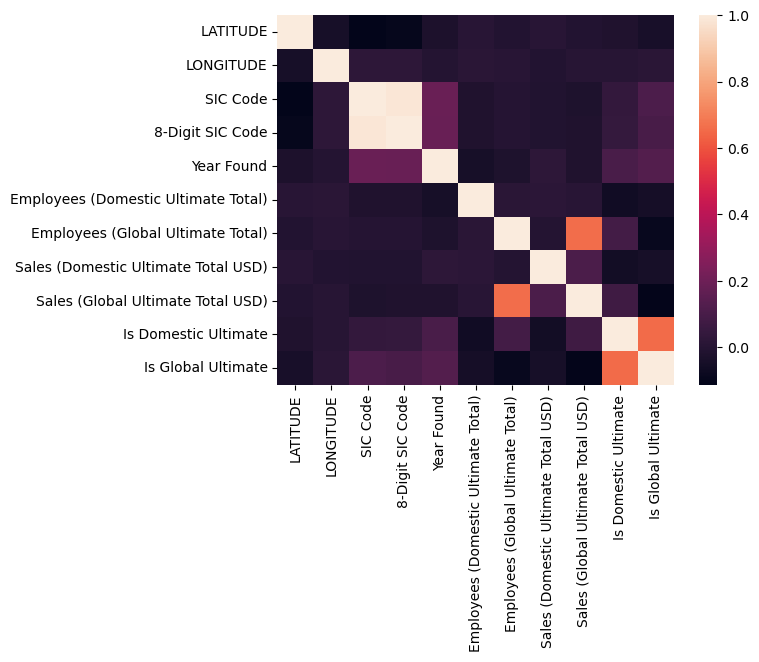

In [91]:
sns.heatmap(corr_df)

In [92]:
# import required libraries
import matplotlib.pyplot as plt

# we will need this for the color gradient representing how high the domestic sales figure is.
from matplotlib.colors import LogNorm
import seaborn as sns

In [93]:
# for the upcoming geospatial analysis portion, we will use a small subset of the data provided for plotting.
filtered_df = data2[data2['SIC Code'].isin([6722, 8741, 8742])]

filtered_df.head(2)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Company Status (Active/Inactive),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
28,1.318815,103.892581,LAKB2BID1598596,SALARY HERO PTE. LTD.,8742.0,Management Consulting Services,87420000.0,Management consulting services,2021.0,Parent,...,Active,5.0,5.0,384985.0,384985.0,SALARY HERO PTE. LTD.,Singapore,SALARY HERO PTE. LTD.,1.0,1.0
43,1.323089,103.883739,LAKB2BID2262198,ERECT GROUP (SINGAPORE) PTE. LTD.,8741.0,Management Services,87410000.0,Management services,1982.0,Parent,...,Active,80.0,80.0,7989040.0,7989040.0,ERECT GROUP (SINGAPORE) PTE. LTD.,Singapore,ERECT GROUP (SINGAPORE) PTE. LTD.,1.0,1.0


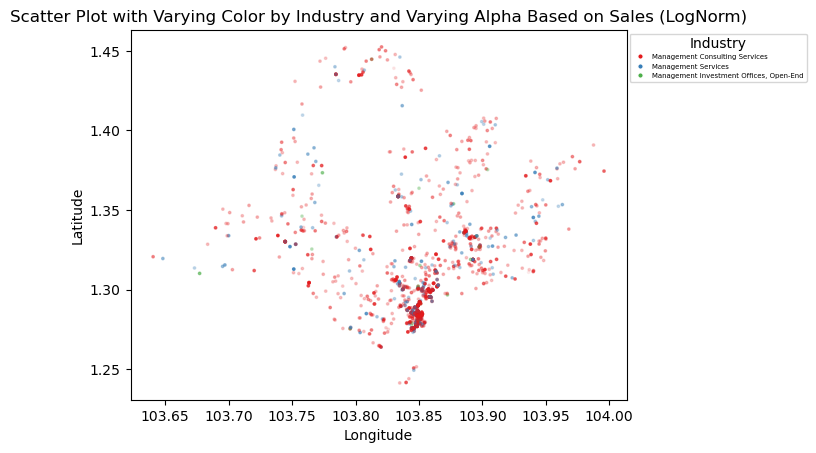

In [94]:
# read in the filtered dataset and do EDA. confusion matrix, etc
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a constant color (e.g., blue)
const_col = 'purple'

# Define a color palette based on unique industries
ind_pal = sns.color_palette('Set1', n_colors=len(filtered_df['Industry'].unique()))

# Create a dictionary to map Industry to a unique color
ind_col = dict(zip(filtered_df['Industry'].unique(), ind_pal))

# Scatter plot with varying color by Industry and varying alpha based on Sales values
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Industry'].map(ind_col), s=3, alpha=norm(filtered_df['Sales (Domestic Ultimate Total USD)']))

# Add a legend for Industry
legend_labels = filtered_df['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry,
                              markerfacecolor=ind_col[industry], markersize=4) for industry in legend_labels]
plt.legend(handles=legend_handles, title='Industry', prop={'size': 5}, loc='upper left', bbox_to_anchor=(1, 1))

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')

# Show the plot
plt.show()

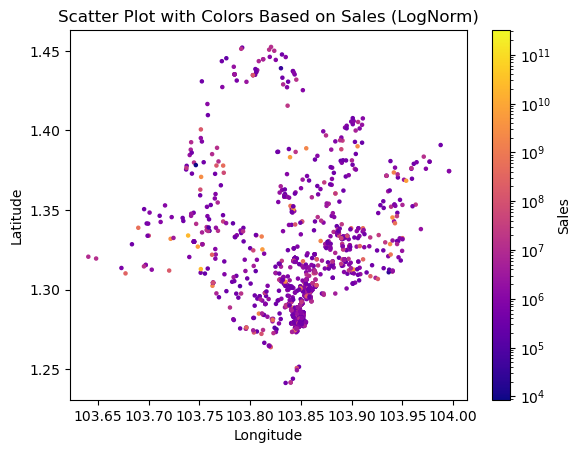

In [95]:
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a colormap transitioning from blue to red
cmap = 'plasma'

# Scatter plot with colors based on Sales values and LogNorm
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)

# Add a colorbar
cbar = plt.colorbar(scatter, label='Sales')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')

# Show the plot
plt.show()

In [96]:
columns_to_drop = ["AccountID", "8-Digit SIC Description", "Global Ultimate Country", "Global Ultimate Company", "Domestic Ultimate Company", "Company Description", "Parent Country", "Parent Company", "Industry","Company", "Company Status (Active/Inactive)","8-Digit SIC Code"]

data4 = data3.drop(columns=[col for col in columns_to_drop if col in data3.columns], errors='ignore')

In [97]:
# Convert 'Is Domestic Ultimate' to True/False
data4['Is Domestic Ultimate'] = data4['Is Domestic Ultimate'] == 1
data4['Is Global Ultimate'] = data4['Is Global Ultimate'] == 1

In [98]:
data4.columns

Index(['LATITUDE', 'LONGITUDE', 'SIC Code', 'Year Found',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Entity_Type_Branch', 'Entity_Type_Independent',
       'Entity_Type_Parent', 'Entity_Type_Subsidiary',
       'Ownership_Type_Non-Corporates', 'Ownership_Type_Nonprofit',
       'Ownership_Type_Partnership', 'Ownership_Type_Private',
       'Ownership_Type_Public', 'Ownership_Type_Public Sector'],
      dtype='object')

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
# Separate features and target variable
X = data4.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = data4['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

In [115]:
# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

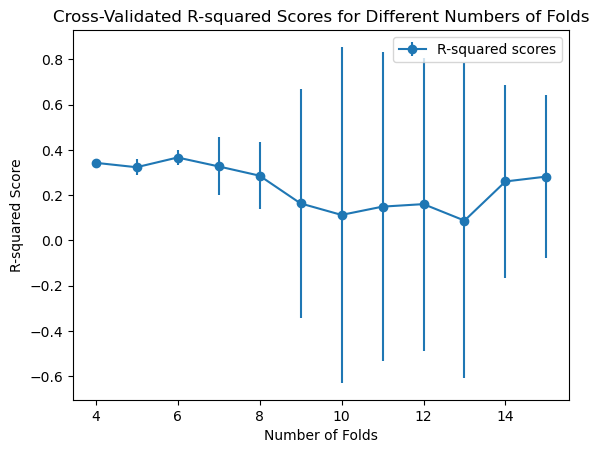

In [116]:
# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

In [117]:
# Use k-fold cross-validation with 10 folds
model_10 = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [ 0.3977893   0.33511424  0.19622585  0.44402556  0.33311223  0.35988173
  0.45874539  0.25961173  0.44095331 -2.10000187]
Mean R-squared score: 0.11254574428160376
Standard Deviation of R-squared scores: 0.7417754091349543
Test R-squared score: 0.48687729137261504


In [118]:
import joblib

# Save the base model to an HDF5 file
joblib.dump(model_10, 'base_model.h5')

['base_model.h5']

In [119]:
def test_model(data):
    # we assume the data is cleaned
    # To load the model in the future
    loaded_model = joblib.load('./base_model.h5')
    predictions = loaded_model.predict(data)

    return predictions

# Extract the last row of the test set
last_row = X_test.iloc[[1]]

# Make predictions on the last row
print(test_model(last_row))

[4.42618632e+08]


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

[]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!